In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
leads_df = pd.read_csv(r"C:\Users\Yogesh\Downloads\Lead Scoring Assignment\Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
leads_df.shape

(9240, 37)

In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
# Checking null values

leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
# checking duplicate values 
print(leads_df.duplicated(subset = ['Prospect ID'], keep = False).sum())
print(leads_df.duplicated(subset = ['Lead Number'], keep = False).sum())


0
0


No duplicate values present in the columns 'Prospect ID' and 'Lead Number'
This shows that Prospect ID & Lead Number are two variables that are just indicative of ID number of people and can be dropped from dataframe.

## EXPLORATORY DATA ANALYSIS

### Data Cleaning & Treatment:

In [ ]:
# Drop Lead Number and Prospect ID, since they both have only unique values

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [ ]:
# Converting 'Select' values to NaN

leads_df = leads_df.replace('Select', np.nan)

In [ ]:
leads_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [ ]:
# Drop columns with only single value
leads_df= leads_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [ ]:
# Checking for null values in % form

100*leads_df.isnull().sum()/len(leads_df)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [ ]:
# Drop columns with more than 40% missing values

leads_df = leads_df.drop(['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Lead Profile', 'Lead Quality', 'How did you hear about X Education'], axis=1)

In [ ]:
# Check the percentage of null values

100*leads_df.isna().sum()/len(leads_df)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [ ]:
# Replace the NaN values with 'not_provided'

leads_df['City'] = leads_df['City'].fillna('not_provided')
leads_df['Tags'] = leads_df['Tags'].fillna('not_provided')
leads_df['Country'] = leads_df['Country'].fillna('not_provided')
leads_df['Specialization'] = leads_df['Specialization'].fillna('not_provided')
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna('not_provided')
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].fillna('not_provided')

In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [ ]:
# checking the percentage of null values again:
round(100*leads_df.isna().sum()/len(leads_df),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

### Categorical Data Analysis:

In [ ]:
leads_df['Country'].value_counts()

India                   6492
not_provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [ ]:
def slots(x):
    bloc = ""
    if x == 'India':
        bloc = 'India'
    elif x == 'not_provided':
        bloc = 'not_provided'
    else:
        bloc = 'Outside India'
    return bloc



In [ ]:
leads_df['Country'] = leads_df.apply(lambda x: slots(x['Country']), axis=1)
leads_df.Country.value_counts()

India            6492
not_provided     2461
Outside India     287
Name: Country, dtype: int64

In [ ]:
# Since around 70% values of Country column is 'India'
# so we are replacing the 'not_provided' value with 'India'

leads_df.Country = leads_df.Country.replace('not_provided', 'India')
leads_df.Country.value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

In [ ]:
# Check the percent of lose if the null values are removed
round(100*(sum(leads_df.isnull().sum(axis=1) > 1)/leads_df.shape[0]),2)

1.48

In [ ]:
leads_df = leads_df[leads_df.isnull().sum(axis=1) <1]

In [ ]:
# Re-checking the percentage of missing values
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [ ]:
leads_df.shape

(9074, 23)

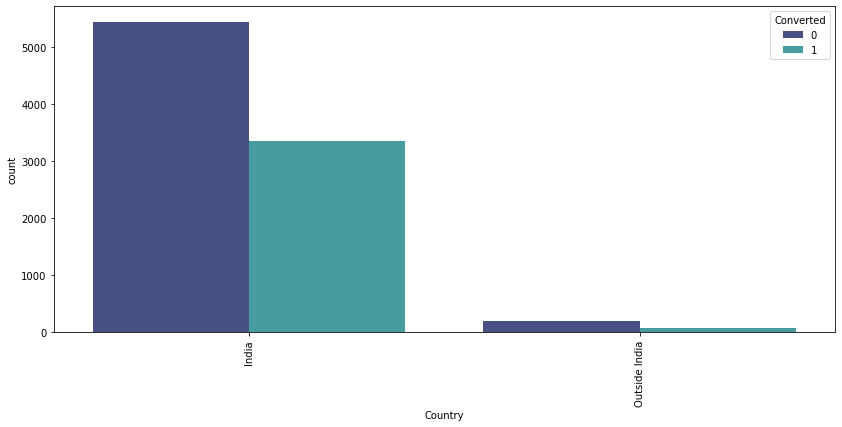

In [ ]:
# Country Column: spread plot

plt.figure(figsize=(14,6))
p1=sns.countplot(leads_df.Country, hue=leads_df.Converted, palette='mako')
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## We can see the Number of Values for India are quite high (nearly 97% of the Data),
# so this column ('Country') can be dropped
# Making a list of the columns that can be dropped
cols_to_drop=['Country']

In [ ]:
# Value counts check of "City" column

leads_df['City'].value_counts(dropna=False)

not_provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

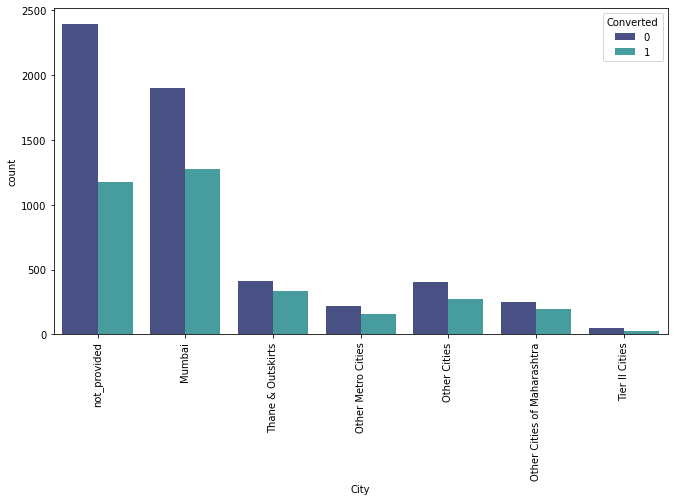

In [ ]:
# Spread of 'City' columnn:

plt.figure(figsize=(11,6))
p1=sns.countplot(leads_df.City, hue=leads_df.Converted, palette='mako')
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

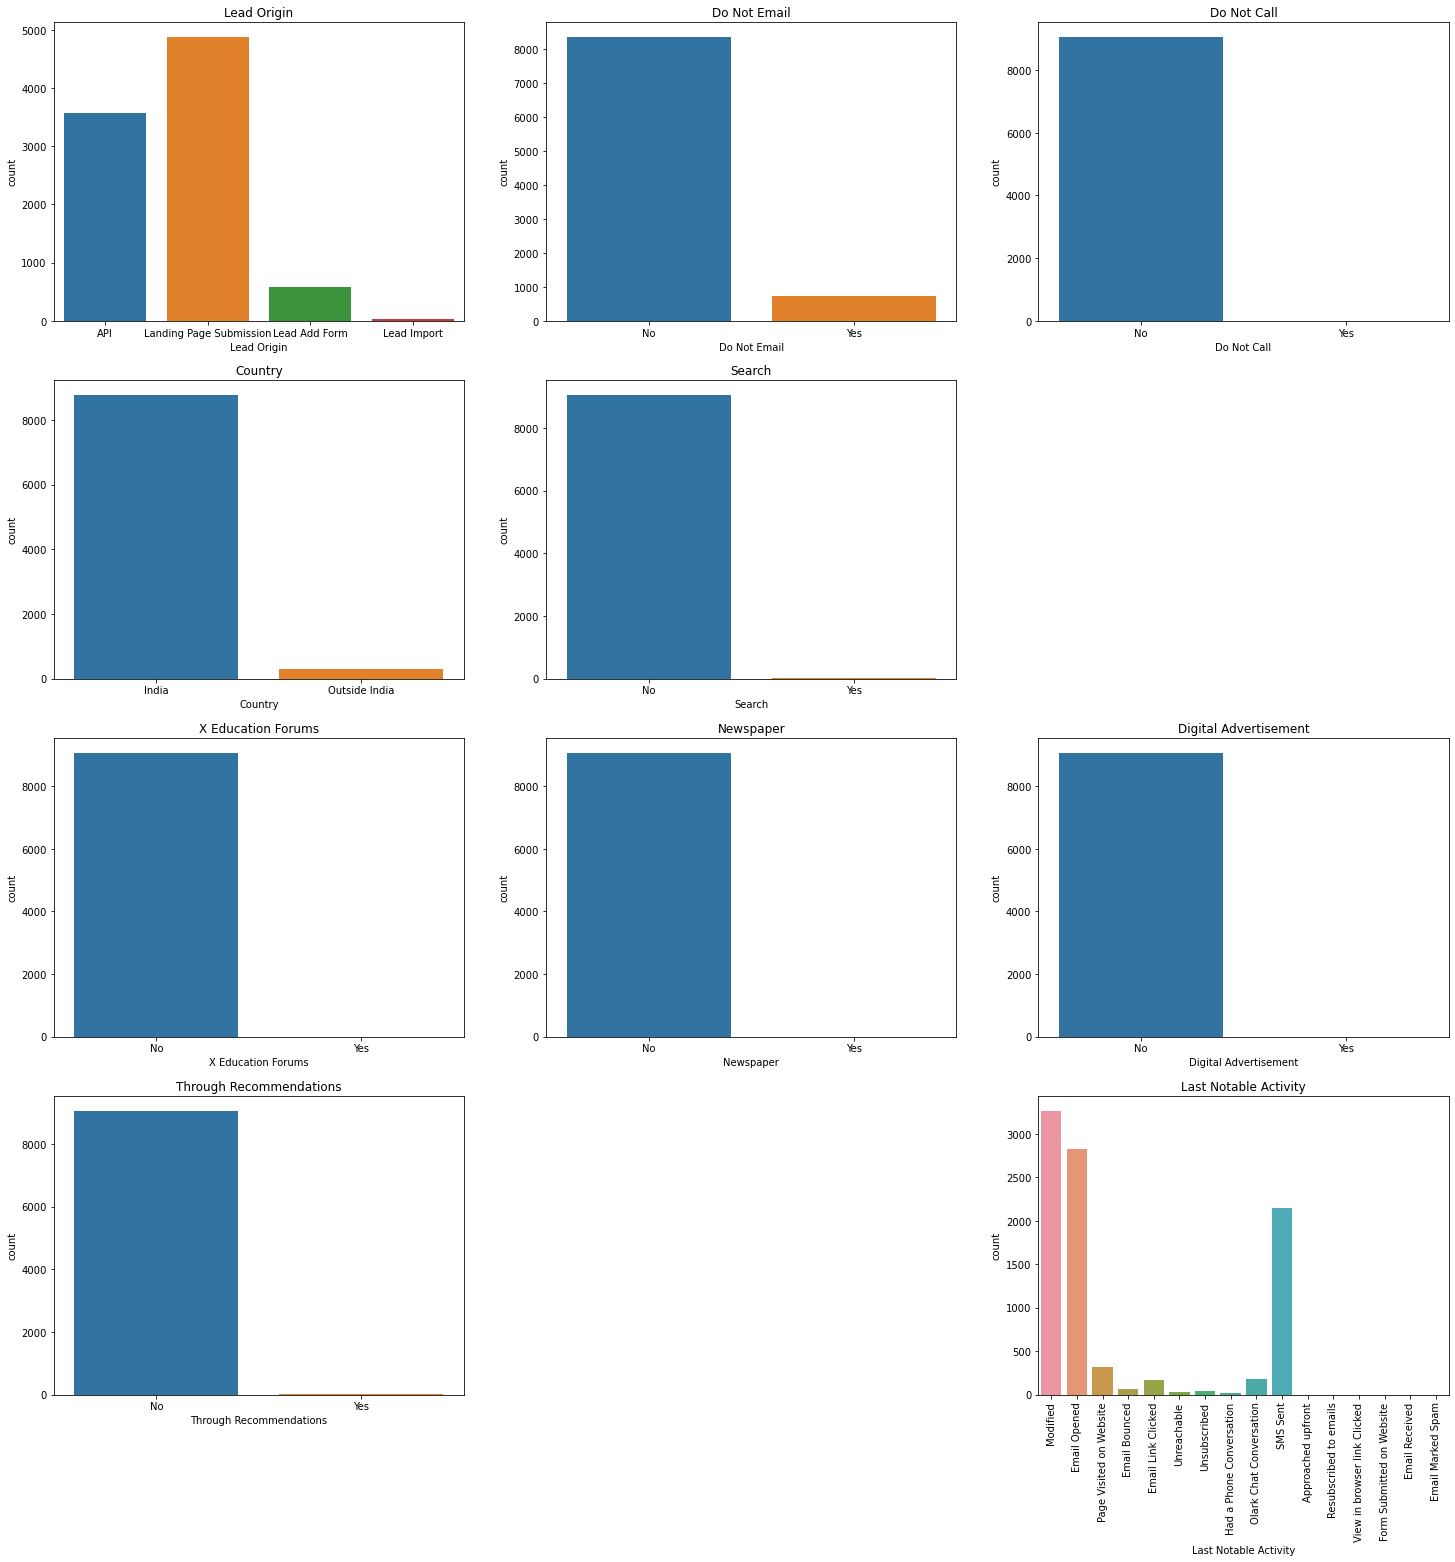

In [ ]:
plt.figure(figsize = (25,45))

plt.subplot(7,3,1)
sns.countplot(leads_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(7,3,2)
sns.countplot(leads_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(7,3,3)
sns.countplot(leads_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(7,3,4)
sns.countplot(leads_df['Country'])
plt.title('Country')

plt.subplot(7,3,5)
sns.countplot(leads_df['Search'])
plt.title('Search')

plt.subplot(7,3,6)
sns.countplot(leads_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(7,3,7)
sns.countplot(leads_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(7,3,8)
sns.countplot(leads_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(7,3,9)
sns.countplot(leads_df['Through Recommendations'])
plt.title('Through Recommendations')


plt.subplot(7,3,10)
sns.countplot(leads_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

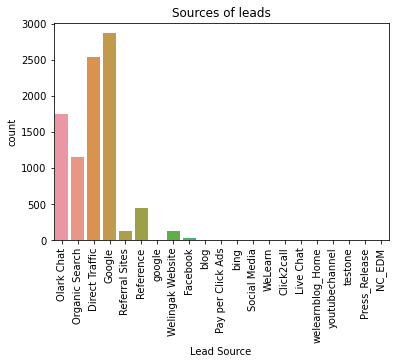

In [ ]:
sns.countplot(leads_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Sources of leads')
plt.show()

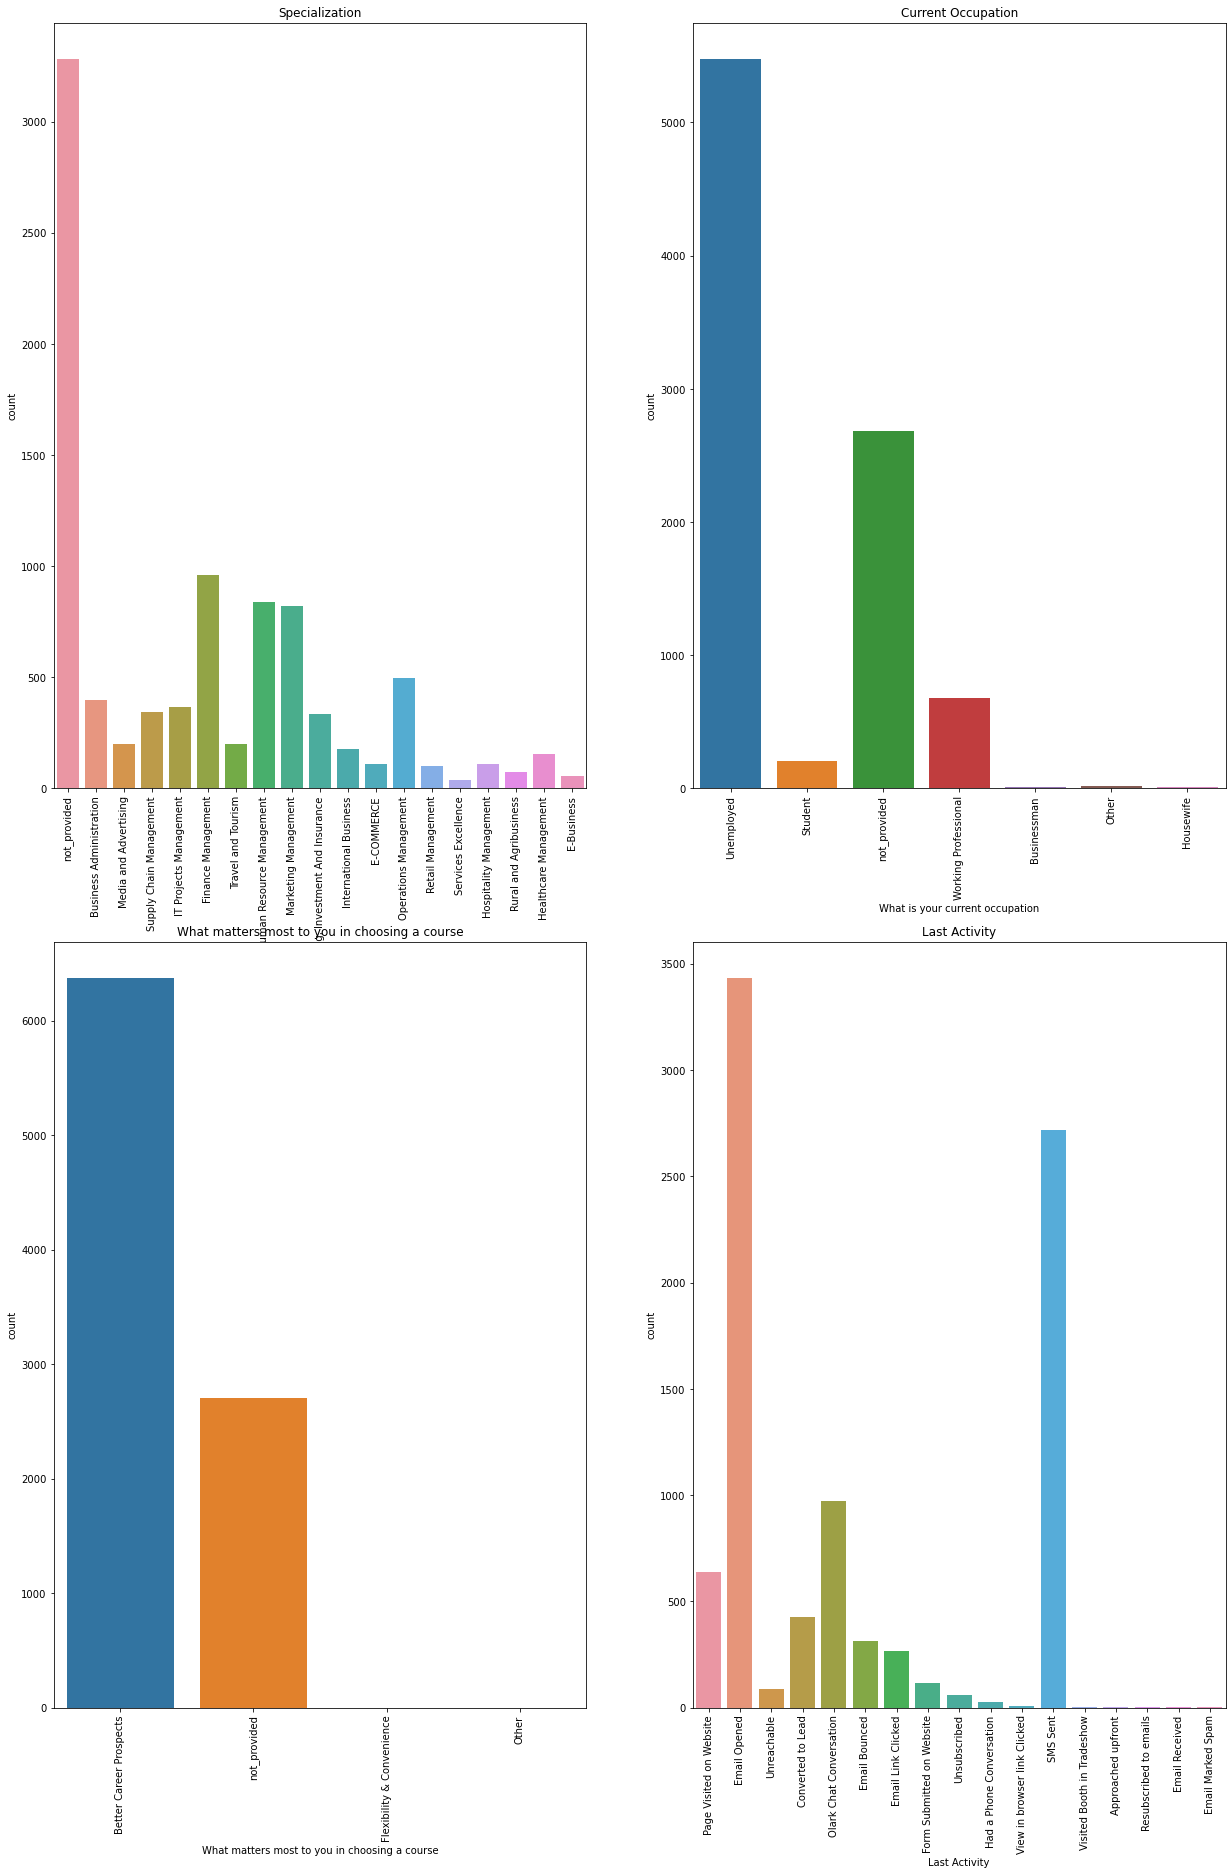

In [ ]:
plt.figure(figsize = (21,31))

plt.subplot(2,2,1)
sns.countplot(leads_df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(leads_df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(leads_df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(leads_df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

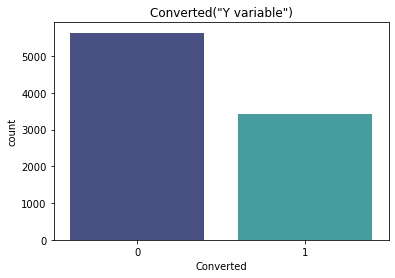

In [ ]:
sns.countplot(leads_df['Converted'], palette='mako')
plt.title('Converted("Y variable")')
plt.show()

### Numerical Variables Analysis

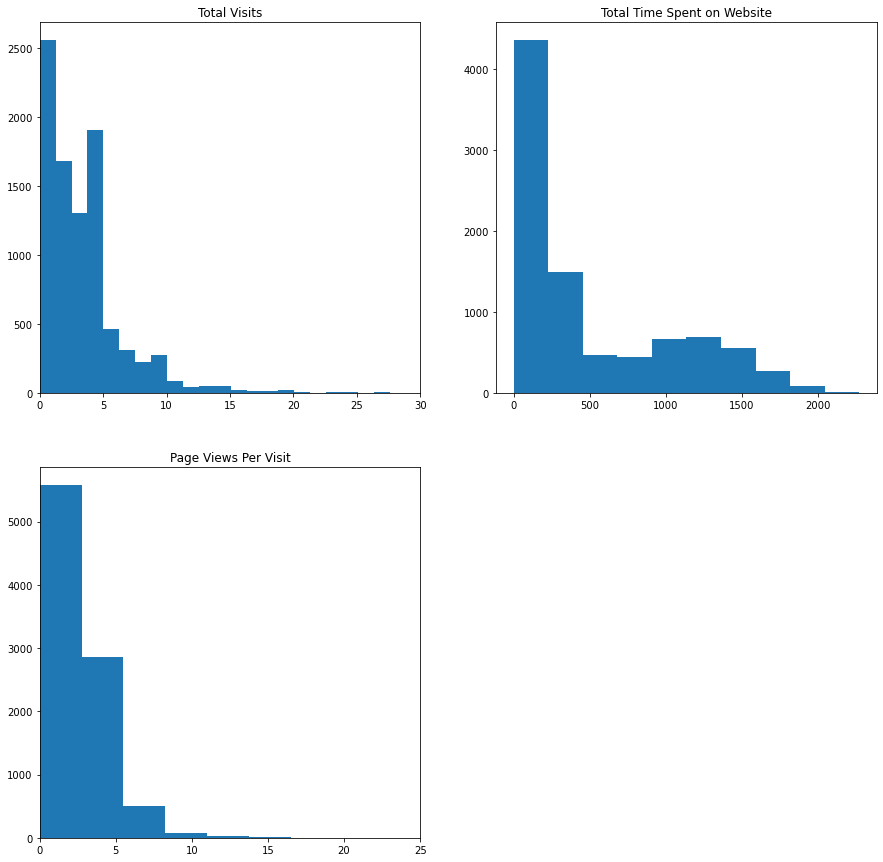

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(221)
plt.hist(leads_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,30)

plt.subplot(222)
plt.hist(leads_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,25)
plt.show( )

## Relation of the categorical variables with convert

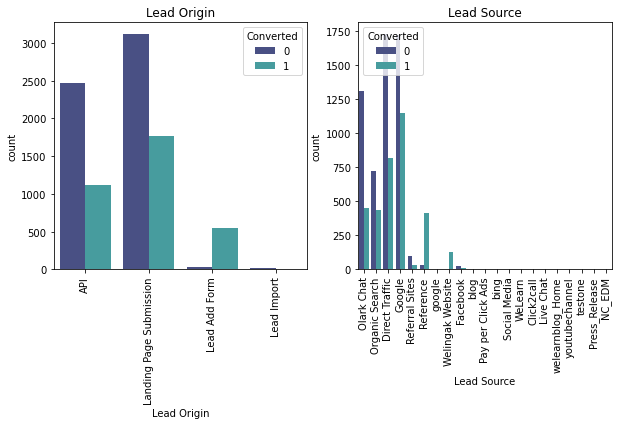

In [ ]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()



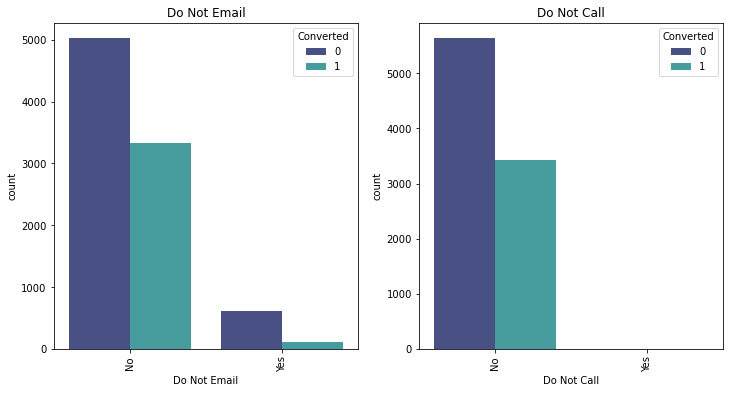

In [ ]:
plt.figure(figsize=(12 ,6))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

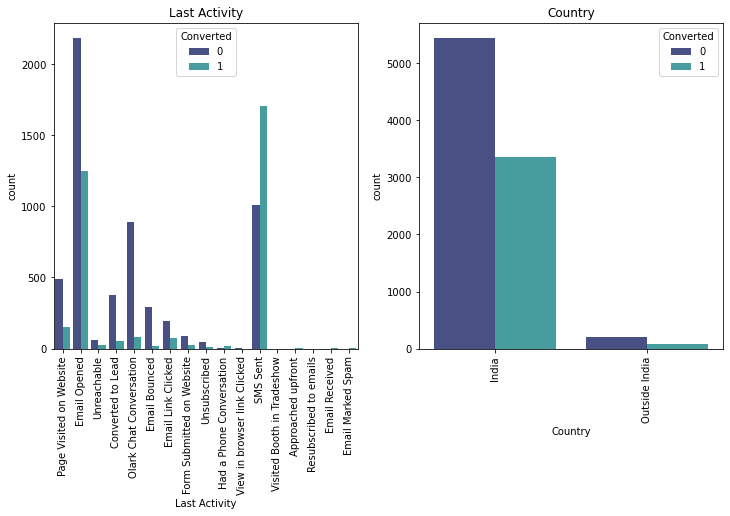

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

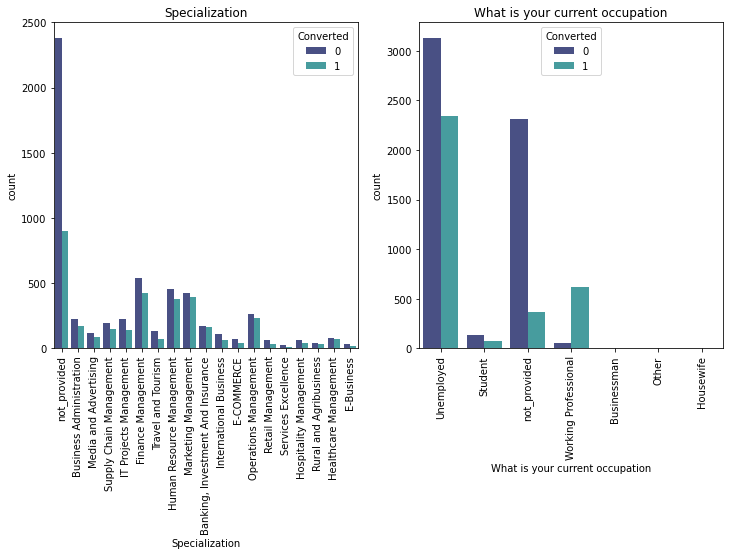

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

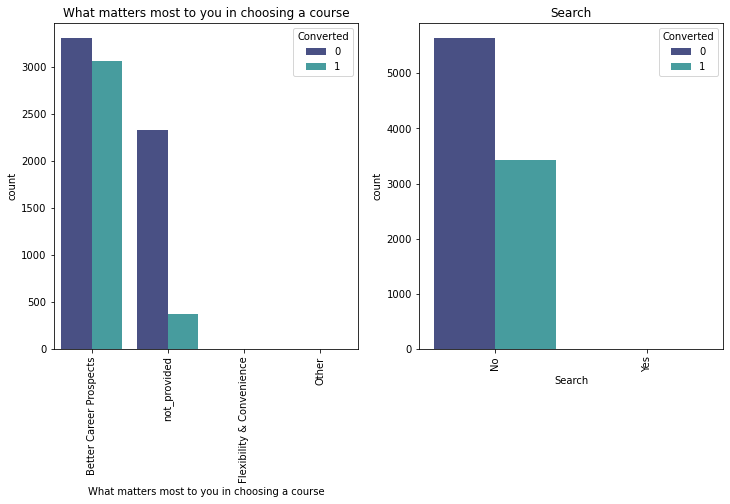

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

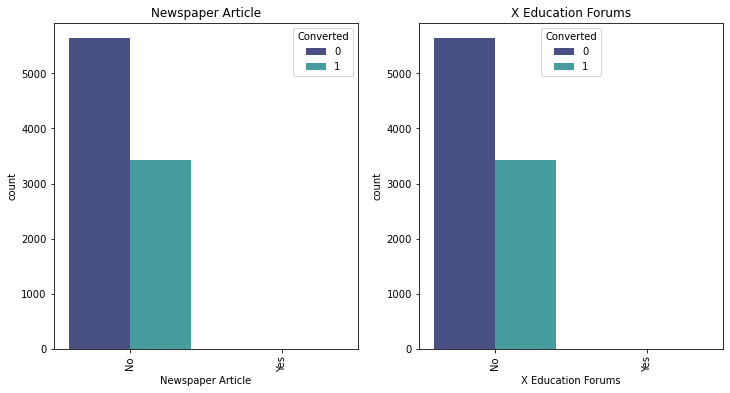

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

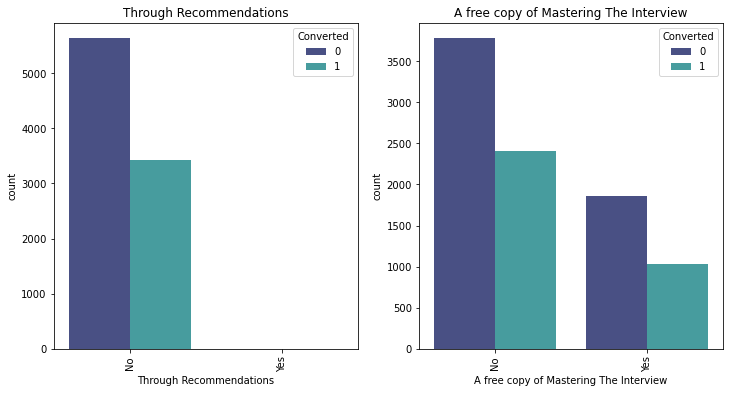

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

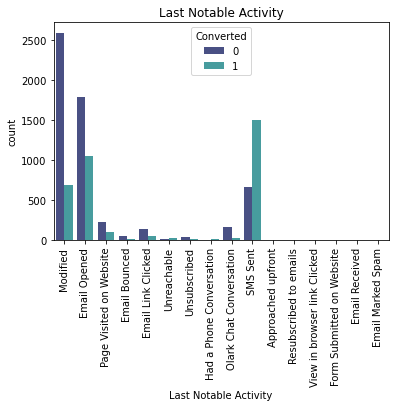

In [ ]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads_df, palette='mako').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

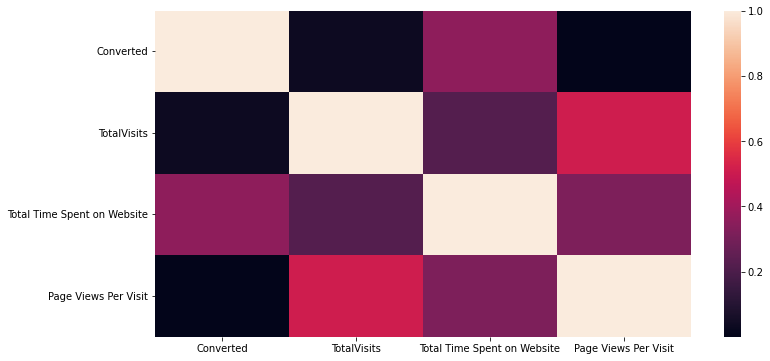

In [ ]:
# To check the correlation among varibles
plt.figure(figsize=(12,6))
sns.heatmap(leads_df.corr())
plt.show()

We can observe from above that there are elements having little data so they might be of less relevance to our analysis.

## Outliers


In [ ]:
num = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


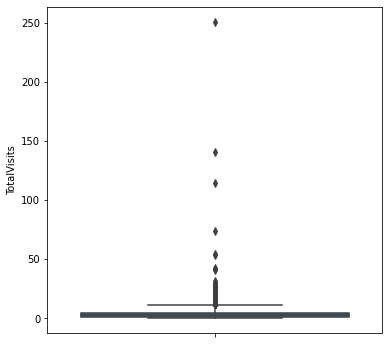

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()



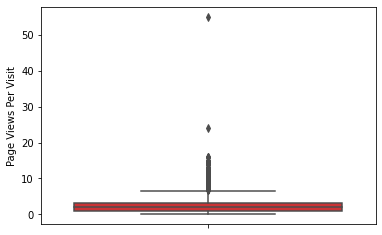

In [ ]:
sns.boxplot(y=leads_df['Page Views Per Visit'],palette='Set1')
plt.show()


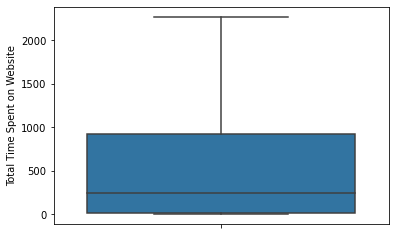

In [ ]:
sns.boxplot(y=leads_df['Total Time Spent on Website'])
plt.show()


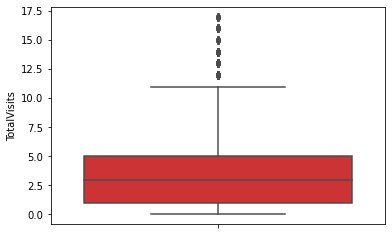

In [ ]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads_df.TotalVisits.quantile(0.99)
leads_df = leads_df[(leads_df.TotalVisits <= Q3)]
Q1 = leads_df.TotalVisits.quantile(0.01)
leads_df = leads_df[(leads_df.TotalVisits >= Q1)]
sns.boxplot(y=leads_df['TotalVisits'],palette='Set1')
plt.show()

## Dummy Variables

In [ ]:
#list of columns to be dropped
cols_to_drop=['Country','Tags']

## "Tags" column can be dropped. Since tags variable is generated by the sales team after disscussion with the student, otherwise it can raise the model accuracy .

In [ ]:
# Columns to be dropped

leads_df = leads_df.drop(cols_to_drop,1)

In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [ ]:
# Generating a categorical columns list:

catcols= leads_df.select_dtypes(include=['object']).columns
catcols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Generating the dummy variables

dum = pd.get_dummies(leads_df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_df_dum = pd.concat([leads_df, dum], axis=1)
leads_df_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not_provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not_provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not_provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
leads_df_dum = leads_df_dum.drop(['City','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads_df_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Train Test Split

In [ ]:
 # Importing the required library
from sklearn.model_selection import train_test_split

In [ ]:
X = leads_df_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y = leads_df_dum['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Dataset split into 70% train and 30% test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [ ]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scaling the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building the Model

In [ ]:
# Importing 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Import RFE
from sklearn.feature_selection import RFE

In [ ]:
# Running RFE with 15 variables as output
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# List of features

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Specialization_Business Administration', False, 63),
 ('Specialization_E-Business', False, 31),
 ('Specialization_E-COMMERCE', False, 60),
 ('Specialization_Finance Management', False, 44),
 ('Specialization_Healthcare Management', False, 54),
 ('Specialization_Hospitality Management', False, 25),
 ('Specialization_Human Resource Management', False, 65),
 ('Specialization_IT Projects Management', False, 59),
 ('Specialization_International Business', False, 62),
 ('Specialization_Marketing Management', False, 45),
 ('Specialization_Media and Advertising', False, 26),
 ('Specialization_Operations Management', False, 52),
 ('Specialization_Retail Management', False, 20),
 ('Specialization_Rural and Agribusiness', False, 64),
 ('Specialization_Servic

In [ ]:
# Put all the columns selected by RFE in the variable 'col'
cols = X_train.columns[rfe.support_]

In [ ]:
# Selecting columns selected by RFE
X_train = X_train[cols]


In [ ]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [ ]:
# Importing statsmodels
import statsmodels.api as sm


In [ ]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.6
Date:                Tue, 28 Feb 2023   Deviance:                       5189.2
Time:                        14:43:27   Pearson chi2:                 6.56e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9203      0.112     -8.198      0.000      -1.140      -0.700
TotalVisits                                              1.9197      0.297      6.470      0.000       1.338       2.501
Total Time Spent on Website                              4.6860      0.169     27.710      0.000       4.355       5.017
Page Views Per Visit                                    -1.9973      0.440     -4.534      0.000      -2.861      -1.134
Lead Origin_Lead Add Form                                4.3894      0.262     16.761      0.000       3.876       4.903
Lead Source_Olark Chat                                   1.3239      0.125     10.602      0.000       1.079       1.569
Lead Source_Welingak Website                             2.4919      1.043      2.390      0.017       0.449       4.535
Do Not Email_Yes                                        -1.8023      0.178    -10.153      0.000      -2.150      -1.454
Last Activity_Olark Chat Conversation                   -1.2806      0.193     -6.633      0.000      -1.659      -0.902
What is your current occupation_Housewife               22.3996   1.75e+04      0.001      0.999   -3.43e+04    3.43e+04
What is your current occupation_Working Professional     2.7658      0.190     14.533      0.000       2.393       3.139
Last Notable Activity_Email Link Clicked                -2.0941      0.264     -7.918      0.000      -2.612      -1.576
Last Notable Activity_Email Opened                      -1.4257      0.089    -15.969      0.000      -1.601      -1.251
Last Notable Activity_Modified                          -1.8460      0.098    -18.811      0.000      -2.038      -1.654
Last Notable Activity_Olark Chat Conversation           -1.5957      0.370     -4.316      0.000      -2.320      -0.871
Last Notable Activity_Page Visited on Website           -2.1194      0.216     -9.823      0.000      -2.542      -1.697
========================================================================================================================
"""

In [ ]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Creating VIF dataframe containing all the variables

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Page Views Per Visit,5.30
0,TotalVisits,5.28
12,Last Notable Activity_Modified,2.02
1,Total Time Spent on Website,1.99
7,Last Activity_Olark Chat Conversation,1.95
11,Last Notable Activity_Email Opened,1.74
4,Lead Source_Olark Chat,1.70
3,Lead Origin_Lead Add Form,1.51
13,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Welingak Website,1.34


In [ ]:
## Removing 'What is your current occupation_Housewife' column as its p value is almost 100%

X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [ ]:
# Refitting the model with the reduced new features set

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.0
Date:                Tue, 28 Feb 2023   Deviance:                       5196.1
Time:                        14:43:27   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3937
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9194      0.112     -8.193      0.000      -1.139      -0.699
TotalVisits                                              1.9082      0.297      6.433      0.000       1.327       2.490
Total Time Spent on Website                              4.6897      0.169     27.742      0.000       4.358       5.021
Page Views Per Visit                                    -1.9902      0.440     -4.520      0.000      -2.853      -1.127
Lead Origin_Lead Add Form                                4.4126      0.262     16.874      0.000       3.900       4.925
Lead Source_Olark Chat                                   1.3207      0.125     10.583      0.000       1.076       1.565
Lead Source_Welingak Website                             2.4653      1.042      2.365      0.018       0.422       4.509
Do Not Email_Yes                                        -1.8048      0.178    -10.165      0.000      -2.153      -1.457
Last Activity_Olark Chat Conversation                   -1.2829      0.193     -6.646      0.000      -1.661      -0.905
What is your current occupation_Working Professional     2.7625      0.190     14.515      0.000       2.390       3.136
Last Notable Activity_Email Link Clicked                -2.0810      0.263     -7.923      0.000      -2.596      -1.566
Last Notable Activity_Email Opened                      -1.4225      0.089    -15.938      0.000      -1.597      -1.248
Last Notable Activity_Modified                          -1.8421      0.098    -18.782      0.000      -2.034      -1.650
Last Notable Activity_Olark Chat Conversation           -1.5917      0.370     -4.305      0.000      -2.316      -0.867
Last Notable Activity_Page Visited on Website           -2.1174      0.216     -9.814      0.000      -2.540      -1.695
========================================================================================================================
"""

In [ ]:
# Creating a VIF dataframe containing all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.30
0,TotalVisits,5.28
11,Last Notable Activity_Modified,2.02
1,Total Time Spent on Website,1.99
7,Last Activity_Olark Chat Conversation,1.95
10,Last Notable Activity_Email Opened,1.74
4,Lead Source_Olark Chat,1.70
3,Lead Origin_Lead Add Form,1.51
12,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Welingak Website,1.34


In [ ]:
## Dropping the column 'Page Views Per Visit' as it has high VIF

X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [ ]:
# Refitting the model with reduced new features set
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.4
Date:                Tue, 28 Feb 2023   Deviance:                       5216.8
Time:                        14:43:28   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3917
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1340      0.102    -11.127      0.000      -1.334      -0.934
TotalVisits                                              1.1295      0.242      4.668      0.000       0.655       1.604
Total Time Spent on Website                              4.6760      0.169     27.716      0.000       4.345       5.007
Lead Origin_Lead Add Form                                4.5981      0.259     17.779      0.000       4.091       5.105
Lead Source_Olark Chat                                   1.5013      0.119     12.640      0.000       1.269       1.734
Lead Source_Welingak Website                             2.4638      1.042      2.364      0.018       0.421       4.507
Do Not Email_Yes                                        -1.8048      0.177    -10.216      0.000      -2.151      -1.459
Last Activity_Olark Chat Conversation                   -1.2706      0.193     -6.585      0.000      -1.649      -0.892
What is your current occupation_Working Professional     2.7574      0.190     14.494      0.000       2.385       3.130
Last Notable Activity_Email Link Clicked                -2.0312      0.261     -7.791      0.000      -2.542      -1.520
Last Notable Activity_Email Opened                      -1.3920      0.089    -15.694      0.000      -1.566      -1.218
Last Notable Activity_Modified                          -1.8100      0.098    -18.556      0.000      -2.001      -1.619
Last Notable Activity_Olark Chat Conversation           -1.5069      0.366     -4.119      0.000      -2.224      -0.790
Last Notable Activity_Page Visited on Website           -1.9247      0.209     -9.227      0.000      -2.333      -1.516
========================================================================================================================
"""

In [ ]:
# Creating a VIF dataframe containing all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.49
6,Last Activity_Olark Chat Conversation,1.94
10,Last Notable Activity_Modified,1.94
1,Total Time Spent on Website,1.92
9,Last Notable Activity_Email Opened,1.68
3,Lead Source_Olark Chat,1.67
2,Lead Origin_Lead Add Form,1.50
11,Last Notable Activity_Olark Chat Conversation,1.35
4,Lead Source_Welingak Website,1.34
7,What is your current occupation_Working Profes...,1.17


### Since all the VIF values are fine and the p-values are below 5%, so we can fix the model and proceed .


## Prediction:


In [ ]:
# Checking the prediction probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.260706
3267    0.997343
5653    0.376645
5072    0.264108
3704    0.113188
1790    0.097252
2482    0.151518
1694    0.191123
8768    0.099328
9225    0.011388
dtype: float64

In [ ]:
# Reshaping it to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.26070636, 0.99734291, 0.37664515, 0.26410836, 0.11318764,
       0.09725167, 0.15151764, 0.19112275, 0.09932813, 0.01138845])

In [ ]:
# Given conversion rate and probability of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.260706
1,1,0.997343
2,1,0.376645
3,0,0.264108
4,0,0.113188


In [ ]:
# Substituting 0 or 1 with the initial cut off = 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.260706,0
1,1,0.997343,1
2,1,0.376645,0
3,0,0.264108,0
4,0,0.113188,0


## Evaluation

In [ ]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics


In [ ]:
# Creating the confusion matrix 
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf

array([[3476,  439],
       [ 743, 1635]], dtype=int64)

In [ ]:
# Predicted        No         Yes
# Actual
# No              3476      439
# Yes             743      1635

In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8121722548863817

Accuracy seems to be good at around 81%

In [ ]:
# True positives
TP = conf[1,1]
# True negatives
TN = conf[0,0]
# False positives
FP = conf[0,1] 
# False negatives
FN = conf[1,0]

In [ ]:
# Sensitivity
TP/(TP+FN)

0.6875525651808242

In [ ]:
# Specificity
TN/(TN+FP)

0.8878671775223499

We have 81% accuracy, Sensitivity around 70% and Specificity around 89% by taking cutoff as 0.5.

## Optimise Cut off (plotting the ROC Curve)

In [ ]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

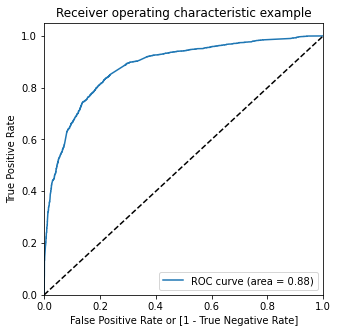

In [ ]:
# Calling ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Area under the curve is 0.88 which is nice.

In [ ]:
# Creating columns with different probability cutoffs 
items = [float(x)/10 for x in range(10)]
for i in items:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.260706,0,1,1,1,0,0,0,0,0,0,0
1,1,0.997343,1,1,1,1,1,1,1,1,1,1,1
2,1,0.376645,0,1,1,1,1,0,0,0,0,0,0
3,0,0.264108,0,1,1,1,0,0,0,0,0,0,0
4,0,0.113188,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    con = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(con))
    accuracy = (con[0,0]+con[1,1])/total1
    
    spec = con[0,0]/(con[0,0]+con[0,1])
    sens = con[1,1]/(con[1,0]+con[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec]
cutoff_df

,prob,accuracy,sens,spec
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.599873,0.961312,0.380332
0.2,0.2,0.759256,0.902019,0.672542
0.3,0.3,0.801367,0.833053,0.782120
0.4,0.4,0.812013,0.765349,0.840358
0.5,0.5,0.812172,0.687553,0.887867
0.6,0.6,0.794375,0.572330,0.929246
0.7,0.7,0.782457,0.500421,0.953768
0.8,0.8,0.764818,0.419680,0.974457
0.9,0.9,0.716193,0.266611,0.989272


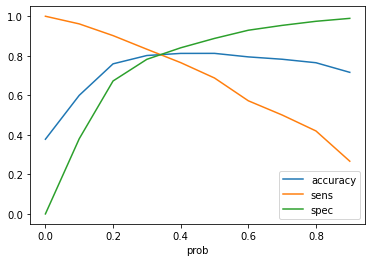

In [ ]:
# Plotting the graph
cutoff_df.plot.line(x='prob', y=['accuracy','sens','spec'])
plt.show()

From the above graph the optimal cut off can be observe at 0.35.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.260706,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.997343,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.376645,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.264108,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.113188,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Checking the overall accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8074050532337518

In [ ]:
# Creating confusion matrix 
conf2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
conf2

array([[3179,  736],
       [ 476, 1902]], dtype=int64)

In [ ]:
# True positives
TP = conf2[1,1]
# True negatives
TN = conf2[0,0]
# False positives
FP = conf2[0,1] 
# False negatives
FN = conf2[1,0]

In [ ]:
# Sensitivity
TP/(TP+FN)


0.7998317914213625

In [ ]:
# Specificity
TN/(TN+FP)

0.8120051085568327

We can observe accuracy, sensitivity and specificity all of them around 80% with the cutoff at 0.35

## Test Set Prediction

In [ ]:
# Scaling of numeric columns
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [ ]:
col = X_train.columns

In [ ]:
# Selecting the columns of X_train for X_test too
X_test = X_test[col]

# Adding constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.117647,0.050176,0,0,0,0,0,0,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,0,0,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0
2169,1.0,0.588235,0.390405,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,0,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,0,0,0,1,0,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.103537
1,1,0.590803
2,1,0.421832
3,0,0.062189
4,0,0.490974


In [ ]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,0,0.103537,0
1,1,0.590803,1
2,1,0.421832,1
3,0,0.062189,0
4,0,0.490974,1
...,...,...,...
2693,1,0.135079,0
2694,1,0.788931,1
2695,0,0.033588,0
2696,1,0.971137,1


In [ ]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.801704966641957

In [ ]:
# Creating confusion matrix 

conf3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
conf3

array([[1345,  332],
       [ 203,  818]], dtype=int64)

In [ ]:
# True positives
TP = conf3[1,1]
# True negatives
TN = conf3[0,0]
# False positives
FP = conf3[0,1] 
# False negatives
FN = conf3[1,0]

In [ ]:
# Sensitivity
TP/(TP+FN)


0.801175318315377

In [ ]:
# Specificity
TN/(TN+FP)

0.8020274299344067

The accuracy, sensitivity and specificity are all around 80% with the cutoff at 0.35

## Precision Recall

In [ ]:
# Confusion Matrix
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf

array([[3476,  439],
       [ 743, 1635]], dtype=int64)

In [ ]:
# Precision = TP / TP + FP

conf[1,1]/(conf[0,1]+conf[1,1])

0.7883317261330762

In [ ]:
#Recall = TP / TP + FN

conf[1,1]/(conf[1,0]+conf[1,1])

0.6875525651808242

The Precision is around 80% and Recall is around 70% with the cutoff at 0.35

### Precision-Recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6288    0
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [ ]:
pr, re, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

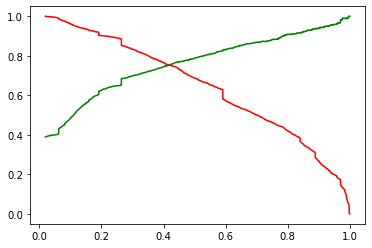

In [ ]:

plt.plot(thresholds, pr[:-1], "g-")
plt.plot(thresholds, re[:-1], "r-")
plt.show()

Observing the cutoff threshold at 0.4

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.260706,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.997343,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.376645,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.264108,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.113188,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8120133481646273

In [ ]:
# Creating confusion matrix again
conf2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
conf2

array([[3290,  625],
       [ 558, 1820]], dtype=int64)

In [ ]:
# True positives
TP = conf2[1,1]
# True negatives
TN = conf2[0,0]
# False positives
FP = conf2[0,1] 
# False negatives
FN = conf2[1,0]

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7443762781186094

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7653490328006728

With the current cut off as 0.40 we can observe Accuracy around 81%, Precision around 75% and Recall around 77%.

## Prediction on Test Dataset

In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.103537
1,1,0.590803
2,1,0.421832
3,0,0.062189
4,0,0.490974


In [ ]:
# Making prediction using cut off 0.40
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,0,0.103537,0
1,1,0.590803,1
2,1,0.421832,1
3,0,0.062189,0
4,0,0.490974,1
...,...,...,...
2693,1,0.135079,0
2694,1,0.788931,1
2695,0,0.033588,0
2696,1,0.971137,1


In [ ]:
# Checking overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8039288361749444

In [ ]:
# Creating the confusion matrix 
conf2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
conf2

array([[1390,  287],
       [ 242,  779]], dtype=int64)

In [ ]:
# True positives
TP = conf2[1,1]
# True negatives
TN = conf2[0,0]
# False positives
FP = conf2[0,1] 
# False negatives
FN = conf2[1,0]

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7307692307692307

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7629774730656219

We can observe the Accuracy at 80%, Precision around 73% and Recall around 76% with the cutoff at 0.40.

### Hence we can observe that model predicts a good Conversion Rate and we can give company CEO confidence in making positive calls based on the above model.

# Conclusion


#### It was observed that important variables in the selecting potential buyers are listed below:

#### TotalVisits
#### Last Activity_Olark Chat Conversation	
#### Last Notable Activity_Modified	
#### Total Time Spent on Website	
#### Last Notable Activity_Email Opened	
#### Lead Source_Olark Chat	
#### Lead Origin_Lead Add Form	
#### Last Notable Activity_Olark Chat Conversation	
#### Lead Source_Welingak Website	
#### What is your current occupation_Working Profes...	
#### Last Notable Activity_Page Visited on Website	
#### Do Not Email_Yes	
#### Last Notable Activity_Email Link Clicked	

### The 'X Education' can bloom its business by focusing on the above variables, since the probability to convert almost all the potential buyers is high.


